# Exploratory Data Analysis - Lipinksi's rule for the FDA New Chemical Entities (2004-2021)

After manually curated the dataset (merged from FDA database and DrugBank database) we are going the explore the Lipinski's rules of the ~400 New Chemical Entitities approved by the <b>FDA</b>. About 30 SMILES were manually gathered since none of the two strategies worked (SMILES from name structures or automatically merged with the DrugBank database).

First we need to import the libraries used in this analysis

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1) Loading the and treating the dataset

Now, we load the database in the CSV format. The curated database was done by GHMS and ACGS.

In [2]:
drugs = pd.read_csv("database_fda_db_with_smiles.csv")

Initially we came to a consensus and left the structures with more than 5000 Daltons out of the analysis, since it is probably a peptide.

In [3]:
# Filtering the structures with more than 5000 Da
drugs = drugs.loc[~(drugs["mw"] > 5000)].reset_index(drop = True)

# Checking the dataframe
drugs

,active_ingredient_moiety,nda_bla,approval_year,active,drugbank_id,drug_groups,smiles,ROMol,mw,n_hba,n_hbd,logp
0,tiotropium bromide,NDA,2004.0,tiotropium,DB01409,approved,[H][C@]12O[C@@]1([H])[C@]1([H])C[C@@]([H])(C[C...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.098477,6,1,2.34570
1,pemetrexed disodium,NDA,2004.0,pemetrexed,DB00642,approved; investigational,NC1=NC(=O)C2=C(NC=C2CCC2=CC=C(C=C2)C(=O)N[C@@H...,"<img data-content=""rdkit/molecule"" src=""data:i...",427.149183,6,6,0.66640
2,cinacalcet hydrochloride,NDA,2004.0,cinacalcet,DB01012,approved,C[C@@H](NCCCC1=CC(=CC=C1)C(F)(F)F)C1=CC=CC2=CC...,"<img data-content=""rdkit/molecule"" src=""data:i...",357.170434,1,1,6.14200
3,telithromycin,NDA,2004.0,telithromycin,DB00976,approved,[H][C@@]12[C@@H](C)C(=O)[C@H](C)C[C@@](C)(OC)[...,"<img data-content=""rdkit/molecule"" src=""data:i...",811.473143,14,1,4.92920
4,apomorphine hydrochloride,NDA,2004.0,apomorphine,DB00714,approved; investigational,[H][C@]12CC3=C(C(O)=C(O)C=C3)C3=CC=CC(CCN1C)=C23,"<img data-content=""rdkit/molecule"" src=""data:i...",267.125929,3,2,2.84990
...,...,...,...,...,...,...,...,...,...,...,...,...
399,tafamidis meglumine,NDA,2019.0,tafamidis meglumine,NaN,NaN,CNC[C@@H]([C@H]([C@@H]([C@@H](CO)O)O)O)O.C1=CC...,"<img data-content=""rdkit/molecule"" src=""data:i...",502.090971,9,7,1.14150
400,givosiran,NDA,2019.0,givosiran,NaN,NaN,C[C@@H]1C[C@H](CN1C(=O)CCCCCCCCCCC(=O)NC(COCCC...,"<img data-content=""rdkit/molecule"" src=""data:i...",1709.968932,30,20,-4.79650
401,dasiglucagon,NDA,2021.0,dasiglucagon,NaN,NaN,C[C@H]([C@@H](C(=O)N[C@@H](CC1=CC=CC=C1)C(=O)N...,"<img data-content=""rdkit/molecule"" src=""data:i...",3379.599700,49,52,-14.68393
402,vosoritide,NDA,2021.0,vosoritide,NaN,NaN,CC[C@H](C)[C@H]1C(=O)NCC(=O)N[C@H](C(=O)N[C@H]...,"<img data-content=""rdkit/molecule"" src=""data:i...",4100.098262,61,61,-20.98876


## 2) Basic data visualization

Since the plots are probably going to be published, this is a very good strategy: to set the context with the seaborn function `set_context()`, which automatically does the job of increasing the datapoints and fonts to yield a better visualization 

In [4]:
sns.set_context("talk")

The following chunks of code are related to the basic plots of distribution of the lipinski's rule:

- A molecular mass less than 500 daltons
- No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)
- No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
- An octanol-water partition coefficient(log P) that does not exceed 5

### 2.1) Molecular Weight distribution

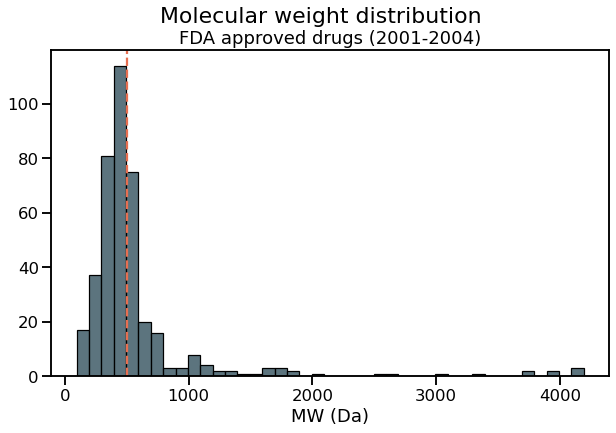

In [5]:
fig, ax = plt.subplots(figsize = (10,6))

mw_dist = sns.histplot(data = drugs, x = "mw", color = "#264653", binwidth = 100).set(title = "FDA approved drugs (2001-2004)", xlabel = "MW (Da)",
                                                            ylabel = "")
ax.axvline(500,color = "#e76f51", linestyle = "--")
fig.suptitle("Molecular weight distribution", fontsize = 22)

#saving plot
fig.savefig("imgs/mw_dist.png", dpi=300)

### 2.2) Number of Hydrogen Bond Donors distribution

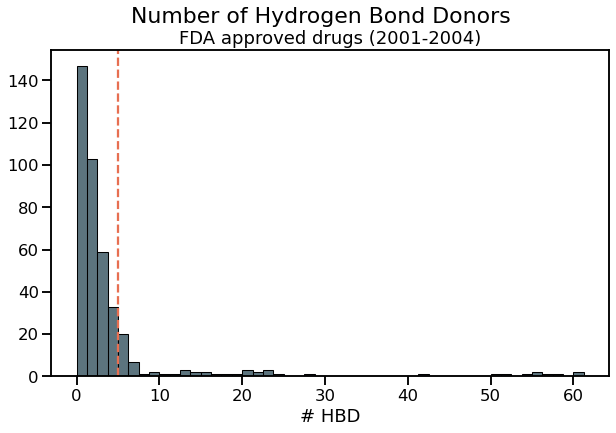

In [6]:
fig, ax = plt.subplots(figsize = (10,6))

hbd_dist = sns.histplot(data = drugs, x = "n_hbd", color = "#264653", binwidth = 1.25).set(title = "FDA approved drugs (2001-2004)", xlabel = "# HBD",
                                                            ylabel = "")
ax.axvline(5,color = "#e76f51", linestyle = "--")
fig.suptitle("Number of Hydrogen Bond Donors", fontsize = 22)

#saving plot
fig.savefig("imgs/hbd_dist.png", dpi=300)

### 2.3) Number of Hydrogen Bond Acceptors

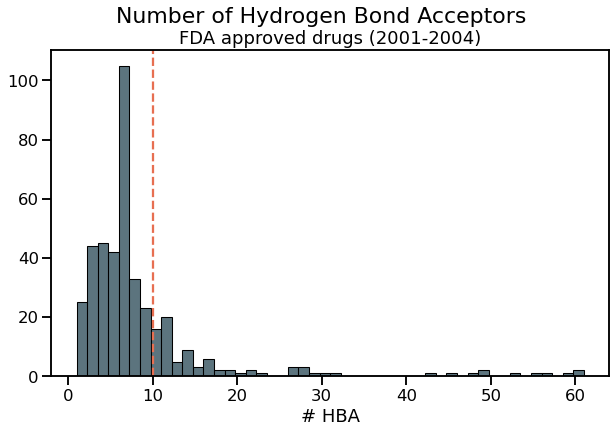

In [7]:
fig, ax = plt.subplots(figsize = (10,6))

hba_dist = sns.histplot(data = drugs, x = "n_hba", color = "#264653", binwidth = 1.25).set(title = "FDA approved drugs (2001-2004)", 
                                                                                xlabel = "# HBA", ylabel = "")
ax.axvline(10,color = "#e76f51", linestyle = "--")
fig.suptitle("Number of Hydrogen Bond Acceptors", fontsize = 22)

#saving plot
fig.savefig("imgs/hba_dist.png", dpi=300)

### 2.4) Calculated LogP Distribution

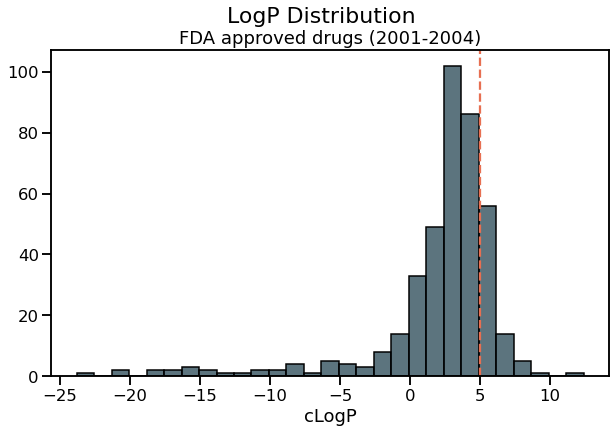

In [8]:
fig, ax = plt.subplots(figsize = (10,6))

logp_dist = sns.histplot(data = drugs, x = "logp", color = "#264653", binwidth = 1.25).set(title = "FDA approved drugs (2001-2004)", 
                                                                                xlabel = "cLogP", ylabel = "")
ax.axvline(5,color = "#e76f51", linestyle = "--")
fig.suptitle("LogP Distribution", fontsize = 22)

#saving plot
fig.savefig("imgs/logp_dist.png", dpi=300)

### 2.5) Distribution of the number of followed rules

We take a first look of the percentage of FDA approved drugs that followed all the Lipinski's rule of five:

In [9]:
# We create a boolean for obeying all the lipinski rules
lipinski = (drugs.mw <= 500) & (drugs.n_hbd <= 5) & (drugs.n_hba <= 10) & (drugs.logp <= 5)

# Printing the percentage
print(f"Percentage of FDA approved drugs that followed all of Lipinki's rule of five: "
      f"{drugs[lipinski].shape[0] / drugs.shape[0] * 100:.2f}%")

Percentage of FDA approved drugs that followed all of Lipinki's rule of five: 54.46%


Creating a column for each rule, in order to take a more deep look into each of 4 rules.

In [10]:
# Creating a column for each rule of the lipinski's rule of five
drugs["lipinski_mw"] = drugs.mw <= 500
drugs["lipinski_hbd"] = drugs.n_hbd <= 5
drugs["lipinski_hba"] = drugs.n_hba <= 10
drugs["lipinski_logp"] = drugs.logp <= 5

# How many rules were followed by each structure?
drugs["n_follow_rules"] = drugs.iloc[:,-4:].sum(axis = 1)

Then, we make a plot containing this information:
### 2.5.1) Countplot of the number of rules followed by the structures in the period

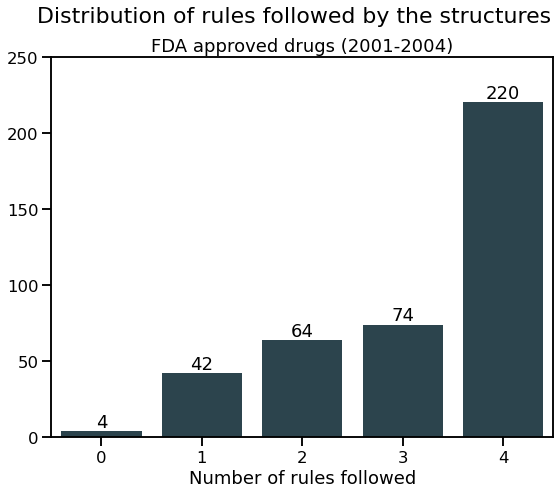

In [18]:
# Setting the plot sizes
fig, ax = plt.subplots(figsize = (9,7))

# The plot
hba_dist = sns.countplot(data = drugs, x = "n_follow_rules", color = "#264653").set(title = "FDA approved drugs (2001-2004)", 
                                                                                xlabel = "Number of rules followed", ylabel = "",
                                                                                   ylim = (0,250))
# Title superior to the title plot
fig.suptitle("Distribution of rules followed by the structures", fontsize = 22)


# This part of the code is relative to the size of the respective bar of the countplot
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{}'.format(int(y)), (x.mean(), y), 
            ha='center', va='bottom', fontsize = 18) # set the alignment of the text
#saving plot
fig.savefig("imgs/n_follow_rules_countplot.png", dpi=300)

In [12]:
IPythonConsole.drawOptions.useBWAtomPalette()
none_lipinski = list(drugs[drugs.n_follow_rules == 0]["smiles"])

ms = [Chem.MolFromSmiles(x) for x in none_lipinski]

img = Draw.MolsToGridImage(ms, subImgSize = (1550,1550), molsPerRow = 1, returnPNG=False)
img.save("imgs/none_lipinski_molecules.png")

In [13]:
drugs[drugs.n_follow_rules == 0]

,active_ingredient_moiety,nda_bla,approval_year,active,drugbank_id,drug_groups,smiles,ROMol,mw,n_hba,n_hbd,logp,lipinski_mw,lipinski_hbd,lipinski_hba,lipinski_logp,n_follow_rules
119,fidaxomicin,NDA,2011.0,fidaxomicin,DB08874,approved,[H][C@@]1(O[C@@H]2[C@@H](CC)\C=C(C)\[C@@H](O)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",1056.425221,18,7,6.2344,False,False,False,False,0
305,tenapanor,NDA,2019.0,tenapanor,DB11761,approved; investigational,CN1C[C@@H](C2=CC(=CC=C2)S(=O)(=O)NCCOCCOCCNC(=...,"<img data-content=""rdkit/molecule"" src=""data:i...",1142.309743,12,6,6.1566,False,False,False,False,0
374,pafolacianine,NDA,2021.0,pafolacianine,DB15413,approved; investigational,CC1(C)\C(=C/C=C2\CCCC(\C=C\C3=[N+](CCCCS(O)(=O...,"<img data-content=""rdkit/molecule"" src=""data:i...",1325.353776,19,8,6.8774,False,False,False,False,0
389,lucinactant,NDA,2012.0,lucinactant,NaN,NaN,CC(C)CC(C(=O)NC(CC(C)C)C(=O)NC(CC(C)C)C(=O)NC(...,"<img data-content=""rdkit/molecule"" src=""data:i...",2527.851533,28,28,6.5678,False,False,False,False,0


In [ ]:
 def neutralize_atoms(mol):
    pattern = Chem.MolFromSmarts("[+1!h0!$([*]~[-1,-2,-3,-4]),-1!$([*]~[+1,+2,+3,+4])]")
    at_matches = mol.GetSubstructMatches(pattern)
    at_matches_list = [y[0] for y in at_matches]
    if len(at_matches_list) > 0:
        for at_idx in at_matches_list:
            atom = mol.GetAtomWithIdx(at_idx)
            chg = atom.GetFormalCharge()
            hcount = atom.GetTotalNumHs()
            atom.SetFormalCharge(0)
            atom.SetNumExplicitHs(hcount - chg)
            atom.UpdatePropertyCache()
    return mol

neutralize_atoms(premetexed.res)

33 numero de atomos antes
31 numero de atomos depois


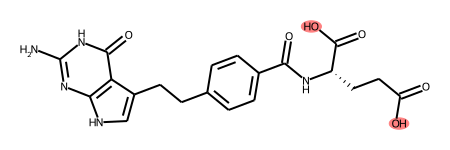

In [39]:
from rdkit import rdBase
from rdkit import Chem
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.Chem.SaltRemover import InputFormat
from rdkit.Chem import AllChem


remover = SaltRemover(defnData="[Cl,Br,Na]")

premetexed = Chem.MolFromSmiles("C1=CC(=CC=C1CCC2=CNC3=C2C(=O)NC(=N3)N)C(=O)N[C@@H](CCC(=O)[O-])C(=O)[O-].[Na+].[Na+]")
print(f'{premetexed.GetNumAtoms()} numero de atomos antes')

premetexed.res = remover.StripMol(premetexed)
print(f'{premetexed.res.GetNumAtoms()} numero de atomos depois')

premetexed.res
